In [18]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import os
import glob
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ARDL
  
pd.DataFrame.iteritems = pd.DataFrame.items


In [28]:
df = pd.read_excel("Data YAMAHEHOO.xlsx", sheet_name="Albuquerque")
df

,Date,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,1959-01-01,NaN,NaN,NaN,33.100,NaN,NaN,NaN,NaN,NaN
1,1959-02-01,NaN,NaN,NaN,33.300,NaN,NaN,NaN,NaN,NaN
2,1959-03-01,NaN,NaN,NaN,33.400,NaN,NaN,NaN,NaN,NaN
3,1959-04-01,NaN,NaN,NaN,33.700,NaN,NaN,NaN,NaN,NaN
4,1959-05-01,NaN,NaN,NaN,34.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
778,2023-11-01,461.001003,372.220412,4567.80,326.925,4.808571,NaN,NaN,7.44,NaN
779,2023-12-01,288.434419,373.332825,4769.83,327.604,4.284000,NaN,NaN,6.82,NaN
780,2024-01-01,NaN,NaN,4845.65,334.265,NaN,NaN,NaN,6.64,NaN
781,NaT,NaN,NaN,5096.27,NaN,NaN,NaN,NaN,6.78,NaN


In [29]:
df = df.dropna()
df.index = range(1, len(df) + 1)
df

,Date,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
1,2000-01-01,455.625386,101.077268,1394.46,144.1,6.670000,0.917000,28.60998,8.21,60.98
2,2000-02-01,447.239418,101.657995,1366.42,144.7,6.410000,0.934333,28.91127,8.33,60.98
3,2000-03-01,469.531214,102.944145,1498.58,145.4,6.140000,0.951667,29.14588,8.24,60.98
4,2000-04-01,366.390557,103.482366,1452.43,145.6,6.270000,0.969000,29.31264,8.15,60.98
5,2000-05-01,427.055297,104.217188,1420.60,144.9,6.360000,0.979333,29.75664,8.52,60.98
...,...,...,...,...,...,...,...,...,...,...
221,2018-05-01,189.016430,251.301384,2705.27,236.8,3.087727,0.758333,51.14390,4.59,76.27
222,2018-06-01,194.818811,252.655254,2718.37,239.2,3.013810,0.767667,51.32391,4.57,76.27
223,2018-07-01,190.522959,252.685891,2816.29,239.6,2.976667,0.777000,51.50468,4.53,76.27
224,2018-08-01,205.173138,251.054972,2901.52,239.4,3.006087,0.777000,51.91254,4.55,76.27


In [30]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df[:].iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.979 => Non-stationary.
 Housing Starts (thousands of units) : P-Value = 0.787 => Non-stationary.
 Home Price Index : P-Value = 0.413 => Non-stationary.
 S&P 500 Closing Price (USD) : P-Value = 0.998 => Non-stationary.
 Construction Index : P-Value = 0.938 => Non-stationary.
 Bond Yield (US) : P-Value = 0.414 => Non-stationary.
 Land Prices : P-Value = 0.667 => Non-stationary.
 "Wages" : P-Value = 0.948 => Non-stationary.
 Mortgage Rates : P-Value = 0.106 => Non-stationary.
 Population : P-Value = 0.25 => Non-stationary.


In [31]:
df_diffed = df.diff().dropna()

from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_diffed[:].iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.921 => Non-stationary.
 Housing Starts (thousands of units) : P-Value = 0.0 => Stationary. 
 Home Price Index : P-Value = 0.221 => Non-stationary.
 S&P 500 Closing Price (USD) : P-Value = 0.0 => Stationary. 
 Construction Index : P-Value = 0.0 => Stationary. 
 Bond Yield (US) : P-Value = 0.0 => Stationary. 
 Land Prices : P-Value = 0.153 => Non-stationary.
 "Wages" : P-Value = 0.0 => Stationary. 
 Mortgage Rates : P-Value = 0.0 => Stationary. 
 Population : P-Value = 0.279 => Non-stationary.


In [32]:
df_diffed2 = df_diffed.diff().dropna()

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_diffed2[:].iteritems():
    adfuller_test(column, name=column.name)

df_diffed2

 Date : P-Value = 0.0 => Stationary. 
 Housing Starts (thousands of units) : P-Value = 0.0 => Stationary. 
 Home Price Index : P-Value = 0.0 => Stationary. 
 S&P 500 Closing Price (USD) : P-Value = 0.0 => Stationary. 
 Construction Index : P-Value = 0.0 => Stationary. 
 Bond Yield (US) : P-Value = 0.0 => Stationary. 
 Land Prices : P-Value = 0.0 => Stationary. 
 "Wages" : P-Value = 0.0 => Stationary. 
 Mortgage Rates : P-Value = 0.0 => Stationary. 
 Population : P-Value = 0.0 => Stationary. 


,Date,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
3,-2 days,30.677765,0.705422,160.20,0.1,-0.010000,1.000000e-09,-0.06668,-0.21,0.0
4,2 days,-125.432454,-0.747928,-178.31,-0.5,0.400000,-1.000000e-09,-0.06785,0.00,0.0
5,-1 days,163.805398,0.196600,14.32,-0.9,-0.040000,-7.000000e-03,0.27724,0.46,0.0
6,1 days,-59.323850,-0.519448,65.83,0.8,-0.250000,1.000000e-09,-0.07017,-0.60,0.0
7,-1 days,-54.574471,0.287828,-57.77,-0.7,0.040000,-1.000000e-09,-0.40913,0.09,0.0
...,...,...,...,...,...,...,...,...,...,...
221,-1 days,38.244457,0.558192,50.04,3.3,0.090108,1.900000e-02,-0.08603,0.09,0.0
222,1 days,9.159152,-2.077964,-44.12,-2.0,-0.149263,9.999999e-10,0.00076,-0.14,0.0
223,-1 days,-10.098234,-1.323232,84.82,-2.0,0.036774,-9.999999e-10,0.00076,-0.02,0.0
224,1 days,18.946032,-1.661557,-12.69,-0.6,0.066563,-9.333333e-03,0.22709,0.06,0.0


In [33]:
from statsmodels import graphics
import statsmodels.api as sm

In [34]:
df_diffed


,Date,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
2,31 days,-8.385968,0.580727,-28.04,0.6,-0.260000,0.017333,0.30129,0.12,0.0
3,29 days,22.291796,1.286149,132.16,0.7,-0.270000,0.017333,0.23461,-0.09,0.0
4,31 days,-103.140657,0.538221,-46.15,0.2,0.130000,0.017333,0.16676,-0.09,0.0
5,30 days,60.664740,0.734822,-31.83,-0.7,0.090000,0.010333,0.44400,0.37,0.0
6,31 days,1.340890,0.215374,34.00,0.1,-0.160000,0.010333,0.37383,-0.23,0.0
...,...,...,...,...,...,...,...,...,...,...
221,30 days,-3.356771,3.431833,57.22,4.4,0.075346,0.009333,0.17925,0.12,0.0
222,31 days,5.802381,1.353870,13.10,2.4,-0.073917,0.009333,0.18001,-0.02,0.0
223,30 days,-4.295852,0.030638,97.92,0.4,-0.037143,0.009333,0.18077,-0.04,0.0
224,31 days,14.650179,-1.630920,85.23,-0.2,0.029420,0.000000,0.40786,0.02,0.0


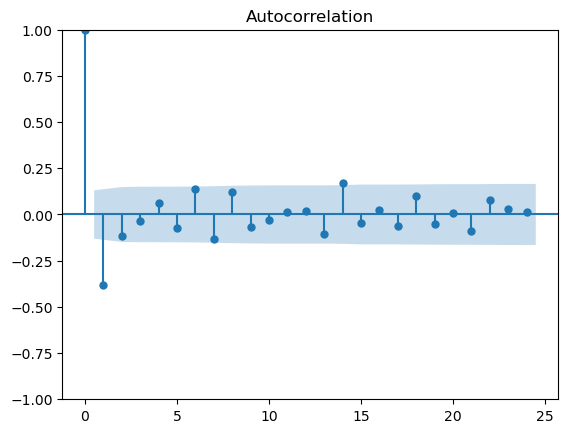

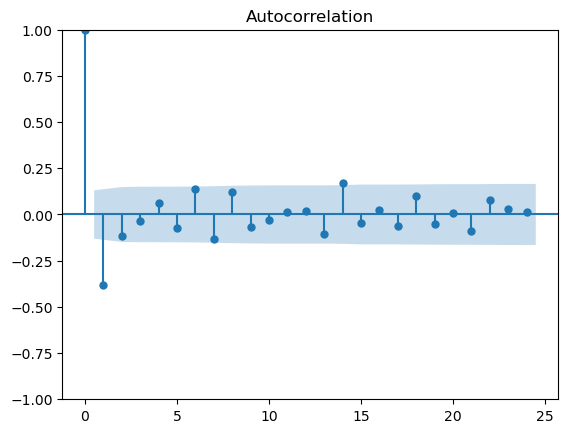

In [35]:
graphics.tsaplots.plot_acf(df_diffed["Housing Starts (thousands of units)"])

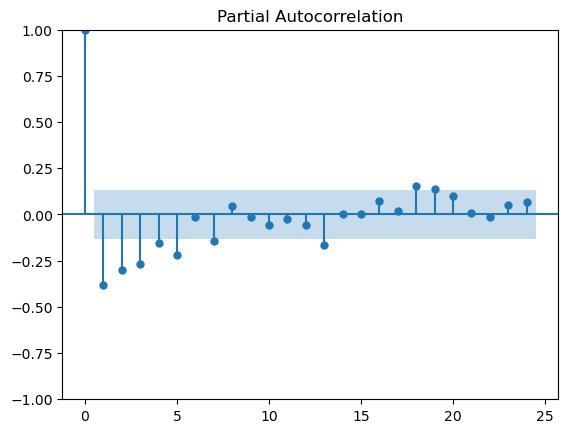

In [36]:
import statsmodels.api as sm
graphics.tsaplots.plot_pacf(df_diffed["Housing Starts (thousands of units)"])

house = df_diffed["Housing Starts (thousands of units)"].iloc[1:]
dataframe_columns = {"Housing Starts (thousands of units)": house}

# "Housing Starts (thousands of units)":[1,2,3,4,5,10] 

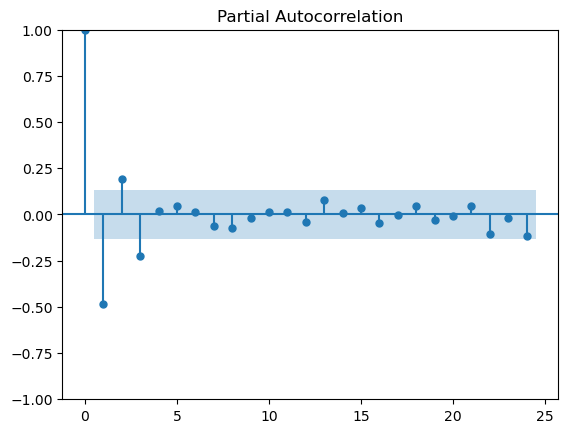

In [37]:
graphics.tsaplots.plot_pacf(df_diffed2["Home Price Index"])

dataframe_columns["Home Price Index"] = df_diffed2["Home Price Index"]

# "Home Price Index": [1,2,3] 

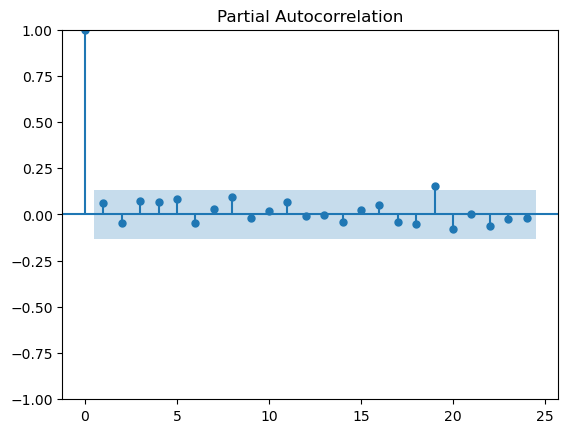

In [38]:
graphics.tsaplots.plot_pacf(df_diffed["S&P 500 Closing Price (USD)"])

dataframe_columns["S&P 500 Closing Price (USD)"] = df_diffed["S&P 500 Closing Price (USD)"].iloc[1:]
# "S&P 500 Closing Price (USD)": [1,2,3,4,7] 

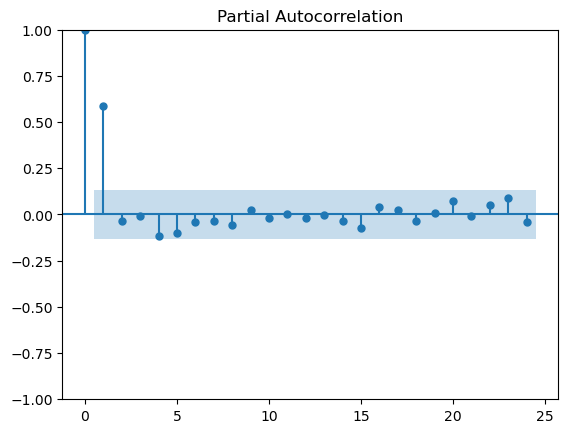

In [39]:
graphics.tsaplots.plot_pacf(df_diffed["Construction Index"])
# Result: [1,2,8] 
dataframe_columns["Construction Index"] = df_diffed["Construction Index"].iloc[1:]


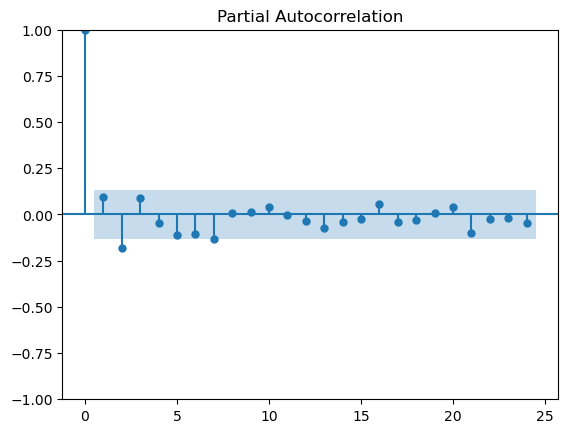

In [40]:
graphics.tsaplots.plot_pacf(df_diffed["Bond Yield (US)"])
# "Bond Yield (US)": [1,2,3,7,8,9] 

dataframe_columns["Bond Yield (US)"] = df_diffed["Bond Yield (US)"].iloc[1:]


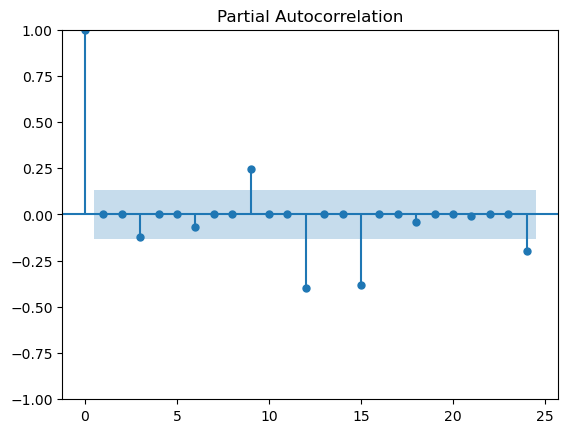

In [41]:
graphics.tsaplots.plot_pacf(df_diffed2["Land Prices"])
# Result: "Land Prices": [3,6] 

dataframe_columns["Land Prices"] = df_diffed2["Land Prices"]



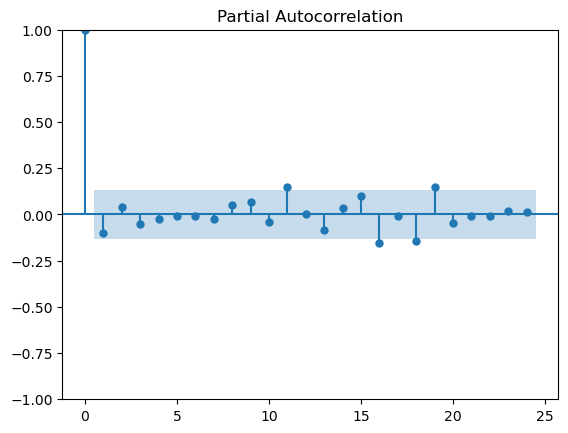

In [42]:
graphics.tsaplots.plot_pacf(df_diffed["\"Wages\""])
# "\"Wages\"": [1,2,3,5,10] 

dataframe_columns["\"Wages\""] = df_diffed["\"Wages\""].iloc[1:]


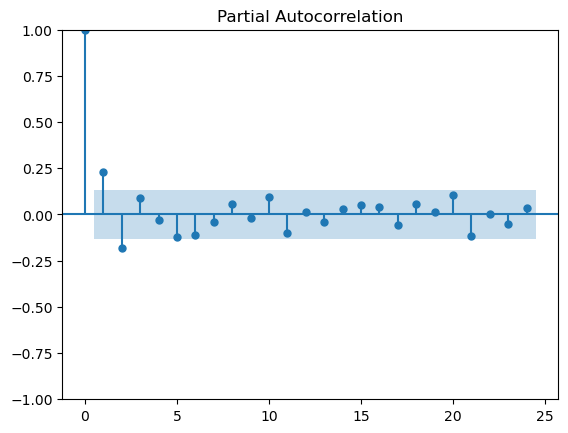

In [43]:
graphics.tsaplots.plot_pacf(df_diffed["Mortgage Rates"])
# Result: "Mortgage Rates": [1,2,3,6,7,9] 

dataframe_columns["Mortgage Rates"] = df_diffed["Mortgage Rates"].iloc[1:]


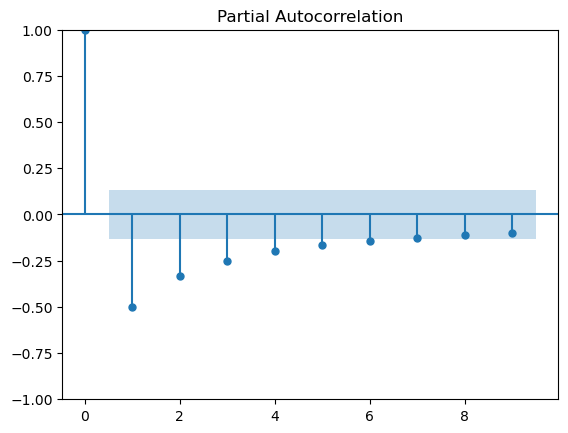

In [44]:
graphics.tsaplots.plot_pacf(df_diffed2["Population"], lags = [i for i in range(10)])
# Result: "Population":[1,2,3,4,5] 

dataframe_columns["Population"] = df_diffed2["Population"]


In [45]:
df_final = pd.DataFrame(data = dataframe_columns)
df_final.index = range(0, len(df_final))
df

,Date,Housing Starts (thousands of units),Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
1,2000-01-01,455.625386,101.077268,1394.46,144.1,6.670000,0.917000,28.60998,8.21,60.98
2,2000-02-01,447.239418,101.657995,1366.42,144.7,6.410000,0.934333,28.91127,8.33,60.98
3,2000-03-01,469.531214,102.944145,1498.58,145.4,6.140000,0.951667,29.14588,8.24,60.98
4,2000-04-01,366.390557,103.482366,1452.43,145.6,6.270000,0.969000,29.31264,8.15,60.98
5,2000-05-01,427.055297,104.217188,1420.60,144.9,6.360000,0.979333,29.75664,8.52,60.98
...,...,...,...,...,...,...,...,...,...,...
221,2018-05-01,189.016430,251.301384,2705.27,236.8,3.087727,0.758333,51.14390,4.59,76.27
222,2018-06-01,194.818811,252.655254,2718.37,239.2,3.013810,0.767667,51.32391,4.57,76.27
223,2018-07-01,190.522959,252.685891,2816.29,239.6,2.976667,0.777000,51.50468,4.53,76.27
224,2018-08-01,205.173138,251.054972,2901.52,239.4,3.006087,0.777000,51.91254,4.55,76.27


In [119]:
cutoff_data = df_diffed2.iloc[:201]#178]
cutoff_data2 = cutoff_data[["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]
cutoff_data["Housing Starts (thousands of units)"]

3       30.677765
4     -125.432454
5      163.805398
6      -59.323850
7      -54.574471
          ...    
199    -17.955471
200    100.753940
201     32.900149
202   -206.880972
203    182.681650
Name: Housing Starts (thousands of units), Length: 201, dtype: float64

In [91]:
cutoff_data2

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
3,0.705422,160.20,1.000000e-01,-0.010000,1.000000e-09,-0.06668,-0.21,0.0
4,-0.747928,-178.31,-5.000000e-01,0.400000,-1.000000e-09,-0.06785,0.00,0.0
5,0.196600,14.32,-9.000000e-01,-0.040000,-7.000000e-03,0.27724,0.46,0.0
6,-0.519448,65.83,8.000000e-01,-0.250000,1.000000e-09,-0.07017,-0.60,0.0
7,0.287828,-57.77,-7.000000e-01,0.040000,-1.000000e-09,-0.40913,0.09,0.0
...,...,...,...,...,...,...,...,...
199,-0.212223,72.83,-2.000000e-01,-0.019483,9.999999e-10,-0.21580,-0.10,0.0
200,0.765079,-77.39,-2.842171e-14,0.260921,1.200000e-02,0.73416,0.13,0.0
201,-0.200830,-0.03,-1.400000e+00,0.048641,-1.000000e-09,-0.54172,0.02,0.0
202,-0.013063,-39.44,2.000000e-01,0.044501,1.000000e-09,0.75815,-0.01,0.0


In [117]:
#"Housing Starts (thousands of units)":[1,2,3,4,5,10], 
dict = {"Home Price Index": [0,1,2,3], "S&P 500 Closing Price (USD)": [0], "Construction Index": [0,1], "Bond Yield (US)": [0,2], "Land Prices": [3,6], "\"Wages\"": [0], "Mortgage Rates": [0,2], "Population":[1,2,3]}
#dict = {"Home Price Index":[3], "Population":[1,2]}#"Construction Index":[0], "Population":[0,1,2]}
from statsmodels.tsa.api import ARDL

model = ARDL(cutoff_data["Housing Starts (thousands of units)"], [1,2])#, cutoff_data2[["Home Price Index", "Population"]], dict)#"Construction Index", 
ardl_model = model.fit()

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [112]:
ardl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       ARDL Model Results                                      
===============================================================================================
Dep. Variable:     Housing Starts (thousands of units)   No. Observations:                  201
Model:                                        ARDL(2,)   Log Likelihood               -1278.079
Method:                                Conditional MLE   S.D. of innovations            148.944
Date:                                 Fri, 01 Mar 2024   AIC                           2564.158
Time:                                         22:10:46   BIC                           2577.331
Sample:                                              2   HQIC                          2569.489
                                                   201                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.4600     10.639      0.043      0.966     -20.521      21.441
Housing Starts (thousands of units).L1    -0.8609      0.064    -13.471      0.000      -0.987      -0.735
Housing Starts (thousands of units).L2    -0.4461      0.064     -6.964      0.000      -0.572      -0.320
==========================================================================================================
"""

In [113]:
ardl_model.predict(15,25)

18      5.918866
19    162.465216
20    -82.754151
21     28.138088
22    289.605836
23   -176.081205
24   -593.413119
25    -65.190478
26           NaN
27           NaN
28           NaN
dtype: float64

In [115]:
x = list(ardl_model.predict(13, 37))#, exog_oos = df_final[201:][["Home Price Index", "Population"]]))#[["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]])) # "Construction Index"
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][2]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][2])
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][1]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][1])
z

[455.625385729484,
 447.23941755568,
 831.9142527924477,
 805.1830383883241,
 391.3098870184646,
 559.6939691526276,
 639.4050334455123,
 584.7889703469006,
 902.532894312618,
 1016.0575248867292,
 246.56320044889574,
 -412.04039642437596,
 337.9866725087922,
 1077.27067584224,
 834.0911160044545,
 544.2631557176096,
 399.727078216611,
 511.65926016579056,
 634.4014480245796,
 364.5784804375936,
 558.6975828353723,
 886.5207365541844,
 674.4642653049079,
 609.1068021090911,
 nan,
 nan,
 nan]

In [107]:
len(x)
print(1-sum((np.asarray(df["Housing Starts (thousands of units)"][180:]) - np.asarray(z[:-3]))**2) / sum((np.asarray(df["Housing Starts (thousands of units)"][180:]) - np.mean(df["Housing Starts (thousands of units)"][180:]))**2))

ValueError: operands could not be broadcast together with shapes (45,) (24,) 

In [108]:
len(z)

27

In [100]:
z

[455.625385729484,
 447.23941755568,
 774.535484917197,
 641.9188461058194,
 420.2769778565671,
 653.201963781937,
 587.6387076406538,
 581.4367552329632,
 807.1763380480313,
 834.7269125172791,
 391.5065959364803,
 133.06567061767754,
 nan,
 nan,
 nan]

In [101]:
df["Housing Starts (thousands of units)"][201]

287.924529797503

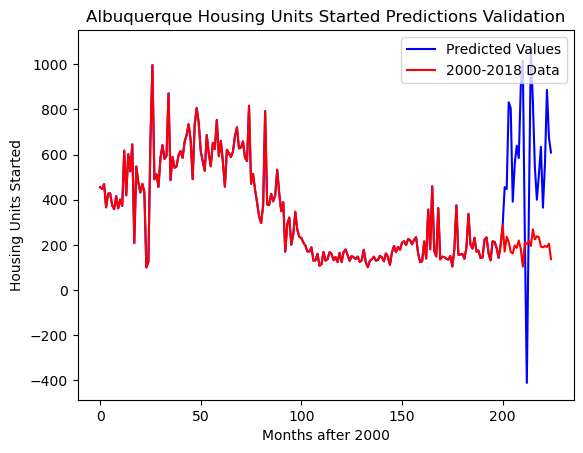

In [122]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot([i for i in range(225)], list(df["Housing Starts (thousands of units)"][:201]) + z[:-3], "b", label = "Predicted Values")
plt.plot([i for i in range(225)], df["Housing Starts (thousands of units)"][0:], "r", label='2000-2018 Data')

leg = plt.legend(loc='upper right')
plt.title("Albuquerque Housing Units Started Predictions Validation")
plt.xlabel("Months after 2000")
plt.ylabel("Housing Units Started")
plt.show()

In [ ]:
ardl_model.forecast(50, cutoff_data2[-50:])

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


178     -4.431727
179      4.517865
180   -288.532006
181    380.860482
182   -315.117224
183    366.544828
184   -275.127880
185    -36.760898
186    245.731406
187   -484.737551
188    477.096893
189   -224.003873
190    -32.333501
191    270.759824
192   -246.377044
193    271.155005
194   -207.928999
195     15.035148
196    -54.074169
197     32.658873
198    171.919844
199   -368.225976
200    194.660487
201    130.725143
202   -264.310453
203    220.380786
204    -83.325514
205     59.764804
206    -48.810774
207    -17.586851
208    199.141712
209   -420.087523
210    543.606058
211   -553.797780
212    294.600102
213   -101.011502
214    -57.658078
215    111.608766
216   -218.948035
217    600.912937
218   -717.357596
219    392.337335
220    -88.452622
221   -155.824562
222    299.863638
223   -240.591249
224    109.382808
225    -47.669683
226    121.473804
227   -168.335390
dtype: float64

In [ ]:
list(cutoff_data2["Home Price Index"])[-1]

0.8440450164250137

In [ ]:
np.std(cutoff_data2["Home Price Index"])

0.6663405500900149

In [ ]:
list(cutoff_data2["Home Price Index"])[-1] + np.random.rand() * 2 * np.std(cutoff_data2["Home Price Index"])

1.189719196290472

In [ ]:
def funx(name):
    return(list(cutoff_data2[name])[-1] + np.random.rand() * 2 * np.std(cutoff_data2[name]))

In [ ]:
[funx("Home Price Index"), funx("S&P 500 Closing Price (USD)"), funx("Construction Index"), funx("Bond Yield (US)"), funx("Land Prices"), funx("\"Wages\""), funx("Mortgage Rates"), funx("Population")]

[1.1855390056425315,
 -38.556558969145165,
 -0.07197532994377667,
 -0.022211579608866522,
 0.0008278972605654856,
 0.5023707574636642,
 0.31383236246827034,
 2.1144921518297903]

In [ ]:
cutoff_data2.iloc[c%168] 

NameError: name 'c' is not defined

In [ ]:
import random
np.random.seed(seed = 6)
rand = np.random.random(6030)
cutoff_data3 = pd.DataFrame(columns = ["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"])
c = 0
for i in range(602):
    cutoff_data3.loc[c] = cutoff_data2.iloc[c%168] + [rand[10 * i + ind] * 2 * np.std(cutoff_data2[name]) - np.std(cutoff_data2[name]) for ind, name in enumerate(["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"])]
    #cutoff_data3.loc[c] = [funx("Home Price Index"), funx("S&P 500 Closing Price (USD)"), funx("Construction Index"), funx("Bond Yield (US)"), funx("Land Prices"), funx("\"Wages\""), funx("Mortgage Rates"), funx("Population")]
    c += 1
cutoff_data3

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,1.228980,136.604191,0.890648,-0.291345,-0.002942,0.245738,-0.196332,-0.249459
1,-0.830366,-145.184046,-0.455607,0.448410,0.000460,0.544904,0.146622,-0.266685
2,-0.397143,45.024181,-0.156261,0.105126,0.003101,0.519789,0.288021,1.406094
3,-0.229888,135.233708,0.198488,-0.144836,0.001995,0.071237,-0.399521,-0.455306
4,0.616348,-26.302792,-0.931099,0.340423,-0.001497,-0.063357,0.186093,-1.282871
...,...,...,...,...,...,...,...,...
597,0.911306,76.644546,0.189989,0.179446,-0.003502,0.012672,0.220726,0.138240
598,-0.022244,-105.747990,1.491294,-0.213222,-0.004228,0.285828,-0.267634,4.812896
599,0.365226,59.894179,0.254102,0.384195,-0.002870,-0.481177,0.288474,-4.214267
600,-1.065546,92.286055,0.745010,-0.529222,-0.002049,0.030141,0.116013,-0.353524


In [ ]:
cutoff_data3.columns

Index(['Home Price Index', 'S&P 500 Closing Price (USD)', 'Construction Index',
       'Bond Yield (US)', 'Land Prices', '"Wages"', 'Mortgage Rates',
       'Population'],
      dtype='object')

In [ ]:
cutoff_data2.columns

Index(['Home Price Index', 'S&P 500 Closing Price (USD)', 'Construction Index',
       'Bond Yield (US)', 'Land Prices', '"Wages"', 'Mortgage Rates',
       'Population'],
      dtype='object')

In [ ]:
cutoff_data2.reset_index(drop=True)

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,0.705422,160.20,1.000000e-01,-0.010000,0.001,0.160128,-0.21,0.0
1,-0.747928,-178.31,-5.000000e-01,0.400000,-0.001,0.103378,0.00,0.0
2,0.196600,14.32,-9.000000e-01,-0.040000,0.001,0.482918,0.46,0.0
3,-0.519448,65.83,8.000000e-01,-0.250000,0.001,-0.124505,-0.60,0.0
4,0.287828,-57.77,-7.000000e-01,0.040000,-0.001,0.050298,0.09,0.0
...,...,...,...,...,...,...,...,...
173,0.233003,102.26,4.000000e-01,-0.047577,-0.003,0.198540,0.02,0.0
174,-0.039760,-103.78,-5.000000e-01,0.204265,-0.001,-0.217866,0.05,0.0
175,0.572015,76.84,2.842171e-14,-0.304373,0.001,0.573297,-0.16,0.0
176,-0.591861,3.75,-3.000000e-01,0.242555,0.007,-0.399833,0.08,0.0


In [ ]:
x = list(ardl_model.forecast(598, cutoff_data3))
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][2]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][2])
z2 = []
for i in range(len(y)):
    if i == 0:
        z2.append(y[i])
    else:
        z2.append(y[i] + y[i-1])

z2 = [df["Housing Starts (thousands of units)"][1]] + list(np.asarray(z2) + df["Housing Starts (thousands of units)"][1])
z2

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[2303.10743478912,
 2612.63862255433,
 2901.824981218398,
 2939.9385031943275,
 2648.356731341103,
 2684.148689755179,
 3008.958945351504,
 2772.3844227290874,
 2792.0217348494866,
 2830.3068481757355,
 2746.6782813858945,
 2787.3861470336037,
 2646.2415795201127,
 2659.2399468719436,
 2983.1861757472843,
 2984.3146803653844,
 2643.6995462766627,
 2637.18144913788,
 2570.5175896996125,
 2488.4687463267924,
 2647.248335106574,
 2525.750868759821,
 2712.101104923833,
 2504.0101901048974,
 2534.1386089450702,
 2864.1957252921798,
 2581.1872987542024,
 2630.6576930409447,
 2705.2690610271334,
 2421.234609501585,
 2537.552915634218,
 2727.571133542715,
 2412.5334153552662,
 2562.6404337190615,
 2542.066606393765,
 2568.634654933464,
 2609.7181354030186,
 2286.73393536902,
 2610.7561055823735,
 2392.259698940479,
 2083.4002772696413,
 2249.3000636380166,
 2275.745978829053,
 2488.1441530438246,
 2285.2437586095666,
 2305.8880249688004,
 2192.5813911423015,
 2353.74258727747,
 2588.7145164399

In [ ]:
len(z2)

50

In [ ]:
len(z)

48

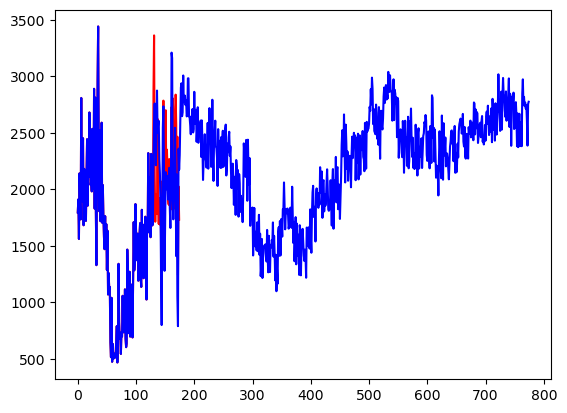

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(175)], df["Housing Starts (thousands of units)"][50:], "r")
plt.plot(list([i for i in range(775)]), list(df["Housing Starts (thousands of units)"][50:180]) + z[:-3] + z2, "b")
plt.show()

OLD

In [ ]:
x = list(ardl_model.predict(10, 62, exog_oos = df_diffed2[170:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][180]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][180])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][179]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][179])
z

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i+178 for i in range(len(z))], z, "b")
plt.plot([i for i in range(len(df["Housing Starts (thousands of units)"]))], df["Housing Starts (thousands of units)"], "r")
plt.show()

In [ ]:
x = list(ardl_model.predict(10, 100, exog_oos = df_diffed2[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]

y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][177]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][177])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][176]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][176])
z

In [ ]:
x = list(ardl_model.predict(10, 46, exog_oos = df_diffed2[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]

y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing Starts (thousands of units)"][177]] + list(np.asarray(y) + df_diffed["Housing Starts (thousands of units)"][177])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing Starts (thousands of units)"][176]] + list(np.asarray(z) + df["Housing Starts (thousands of units)"][176])
z

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(list(ardl_model.predict(0, 166)[7:164]) + list([i for i in range(len(x))])))], list(ardl_model.predict(0, 166)[7:164]) + x, "b")
plt.plot([i for i in range(len(df_diffed2["Housing Starts (thousands of units)"]))], df_diffed2["Housing Starts (thousands of units)"], "r")
plt.show()

In [ ]:
import statsmodels.api as sm
graphics.tsaplots.plot_pacf(df_diffed["Housing Starts (thousands of units)"])

In [ ]:
res = arimamodel.fit()
res.summary()

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(res.predict(0)))], res.predict(0), "b")
plt.plot([i for i in range(len(res.predict(0)))], df_diffed2["Housing Starts (thousands of units)"][:(len(res.predict(0)))], "r")
plt.show()

In [ ]:
x = []
for i in range(len(res.predict(0)),225):
    x.append(float(res.predict(i)))

import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(res.predict(0)))], df_diffed2["Housing Starts (thousands of units)"][:(len(res.predict(0)))], "r")
plt.plot([i for i in range(225)], list(res.predict(0))+list(x), "b")
plt.show()